In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import numpy as np

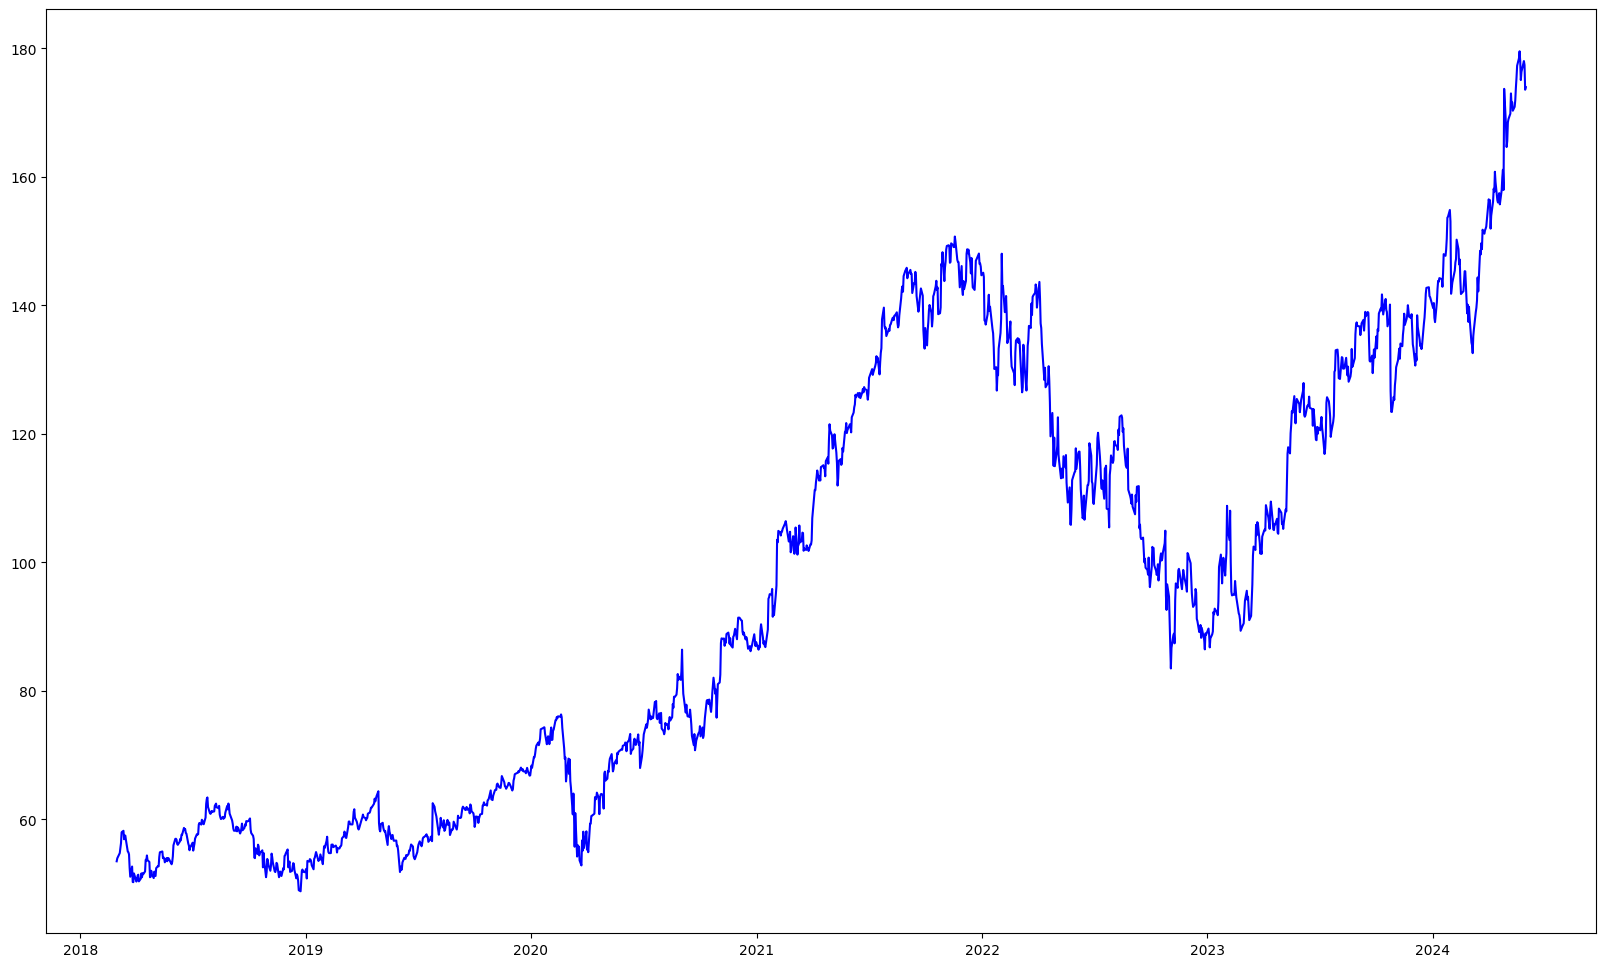

                Close
Date                 
2018-03-01  53.476002
2018-03-02  53.945999
2018-03-05  54.546501
2018-03-06  54.752998
2018-03-07  55.481998
             Close
count  1574.000000
mean     96.587886
std      34.376003
min      48.811001
25%      61.208501
50%      94.959999
75%     129.118252
max     179.539993


In [2]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('D:/IS403_O21_HTCL_15/Dataset/GOOG.csv')

# Chọn cột 'Close' và cột 'Date'
df = df[['Date', 'Close']]

# Chuyển đổi cột 'Date' thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

# Thiết lập cột 'Date' làm chỉ mục
df.set_index('Date', inplace=True)

# Vẽ biểu đồ dữ liệu
plt.figure(figsize=(20, 12))
plt.plot(df.index, df, label='Data AAPL', color='blue')
plt.show()

# Kiểm tra dữ liệu
print(df.head())
print(df.describe())

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])


In [3]:
# Định nghĩa bước thời gian
time_window = 40

#Chia pha train - test
train_size = int(len(df) * 0.9)
train_data = df[0:train_size]
test_data = df[train_size:len(df)]

print(train_data.tail())
print(test_data.head())
print(len(test_data))
#Lấy thêm time_window ngày từ tập train vào tập test để dự đoán ngày đầu tiên của tập test
test_data = pd.concat([train_data[-time_window:], test_data])

print(test_data.head(10))
print(len(test_data))

               Close
Date                
2023-10-09  0.693718
2023-10-10  0.691423
2023-10-11  0.710546
2023-10-12  0.699761
2023-10-13  0.686680
               Close
Date                
2023-10-16  0.701291
2023-10-17  0.705115
2023-10-18  0.692035
2023-10-19  0.689740
2023-10-20  0.672605
158
               Close
Date                
2023-08-18  0.606591
2023-08-21  0.612863
2023-08-22  0.618677
2023-08-23  0.645603
2023-08-24  0.624261
2023-08-25  0.626326
2023-08-28  0.634741
2023-08-29  0.663043
2023-08-30  0.674059
2023-08-31  0.677271
198


In [4]:

# Tạo hàm để tạo tập dữ liệu huấn luyện
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


# Tạo dữ liệu cho mô hình
X_train, y_train = create_dataset(train_data.values, time_window)
X_test, y_test = create_dataset(test_data.values, time_window)

In [5]:
# Xây dựng và huấn luyện mô hình MLP
# Build the model
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(50, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
# model.fit(X_train, y_train)

c:\Users\GIAHUY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1580 - val_loss: 0.0028
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1302e-04 - val_loss: 0.0011
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9622e-04 - val_loss: 9.8775e-04
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8378e-04 - val_loss: 0.0019
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.5462e-04 - val_loss: 8.3389e-04
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4988e-04 - val_loss: 9.9843e-04
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1360e-04 - val_loss: 7.1524e-04
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0491e-04 - val_loss: 7.0865e-04
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5404e-04 - val_loss: 6.9298e-04
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7435e-04 - val_loss: 6.0163e-0

In [6]:
# Dự đoán
# train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

test_data = test_data[time_window:]

print(len(X_test))
print(len(y_test))
print(len(test_data))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
158
158
158


In [7]:

# Đánh giá mô hình
# train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
# Reshape test_predict for compatibility with DataFrame creation
test_predict_reshaped = test_predict.reshape(-1, 1)

# Create a DataFrame with test_data index and test_predict values
predicted_test = pd.DataFrame(test_predict_reshaped, index=test_data.index, columns=["predicted_value"])


In [8]:
# Hàm dự đoán ngày tiếp theo
def predict_future(data, model, window_size, days):
    future_preds = []
    last_window = list(data[-window_size:])
    for _ in range(days):
        next_pred = model.predict(np.array(last_window).reshape(1, window_size))
        future_preds.append(next_pred[0, 0])  # Accessing the first element directly
        last_window.append(next_pred[0, 0])
        last_window.pop(0)
    return future_preds

# Dự đoán 90 ngày tiếp theo
days_to_predict = 90
future_predictions = predict_future(test_data['Close'].values, model, time_window, days_to_predict)

# Tạo các ngày tiếp theo
next_days_index = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=days_to_predict)

# Tạo DataFrame cho các dự đoán tiếp theo
future_df = pd.DataFrame(future_predictions, index=next_days_index, columns=['Close Predict'])

train_data['Close'] = scaler.inverse_transform(train_data[['Close']])
test_data['Close'] = scaler.inverse_transform(test_data[['Close']])
future_df['Close Predict'] = scaler.inverse_transform(future_df[['Close Predict']])

print(future_df.head())
print(next_days_index)

# print(train_data.tail())
print(test_data.tail())
# print(predicted_test.head())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

C:\Users\GIAHUY\AppData\Local\Temp\ipykernel_18204\2781551278.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Close'] = scaler.inverse_transform(train_data[['Close']])


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Đánh giá MAE
mae = mean_absolute_error(test_data['Close'], predicted_test['predicted_value'])
print("Mean Absolute Error (MAE):", mae)

# Đánh giá MSE
mse = mean_squared_error(test_data['Close'], predicted_test['predicted_value'])
print("Mean Squared Error (MSE):", mse)

# Đánh giá RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Đánh giá MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], predicted_test['predicted_value'])
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 2.7422317313804143
Mean Squared Error (MSE): 12.611226188395364
Root Mean Squared Error (RMSE): 3.5512288279404585
Mean Absolute Percentage Error (MAPE): 1.8546714588387458


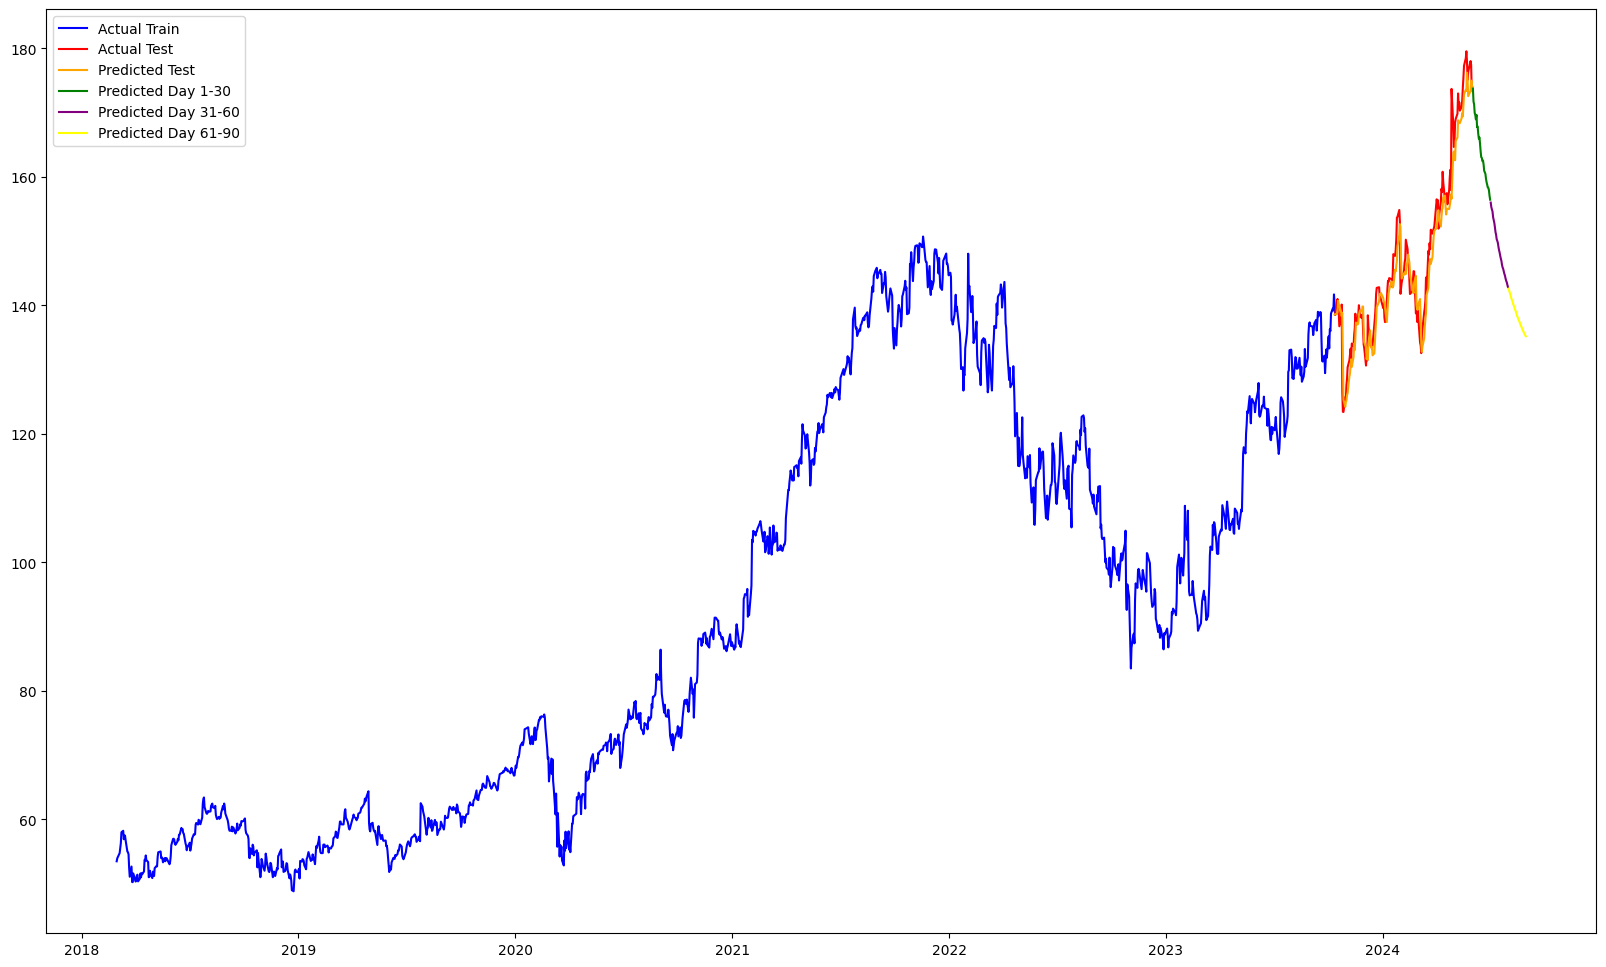

In [10]:
# Thêm phần tử cuối của train_data vào đầu của test_data và df_predicted
last_train_data = train_data.iloc[-1]
test_data = pd.concat([pd.DataFrame(last_train_data).T, test_data])
predicted_test = pd.concat([pd.DataFrame(last_train_data['Close'], index=[test_data.index[0] - pd.Timedelta(days=1)], columns=["predicted_value"]), predicted_test])

# Tạo 3 phần dữ liệu cho 90 ngày tiếp theo
future_df_1 = future_df[:30]
future_df_2 = future_df[30:60]
future_df_3 = future_df[60:]

# Vẽ biểu đồ dự đoán và thực tế
plt.figure(figsize=(20, 12))
plt.plot(train_data.index, train_data, label='Actual Train', color='blue')
plt.plot(test_data.index, test_data, label='Actual Test', color='red')
plt.plot(predicted_test.index, predicted_test, label='Predicted Test', color='orange')
plt.plot(future_df_1.index, future_df_1, label='Predicted Day 1-30', color='green')
plt.plot(future_df_2.index, future_df_2, label='Predicted Day 31-60', color='purple')
plt.plot(future_df_3.index, future_df_3, label='Predicted Day 61-90', color='yellow')
plt.legend()
plt.show()
